## Deep Learning fundamentals

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('diabetes_scale.csv', delimiter = '1:|2:|3:|4:|5:|6:|7:|8:', header = None, engine='python')
df

,0,1,2,3,4,5,6,7,8
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000
...,...,...,...,...,...,...,...,...,...
763,1,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000
764,1,-0.764706,0.226131,0.147541,-0.454545,-1.000000,0.096870,-0.776260,-0.800000
765,1,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000
766,-1,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333


In [3]:
df.iloc[:,0].value_counts()

 1    500
-1    268
Name: 0, dtype: int64

In [4]:
df = df.rename( columns= {0:'Outcome', 1:'Preganacies', 2:'Glucose', 3:'BloodPressure', 4:'SkinThickness',5:'Insulin',
                    6:'BMI', 7:'DiabetesPedFunc', 8:'Age'})

In [5]:
# See basic statistical details
df.describe()

,Outcome,Preganacies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedFunc,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,759.000000
mean,0.302083,-0.547641,0.215020,0.131574,-0.585122,-0.810410,-0.047279,-0.662247,-0.599166
std,0.953903,0.396421,0.321333,0.319896,0.322267,0.273036,0.237041,0.284229,0.388652
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-0.882353,-0.005025,0.016393,-1.000000,-1.000000,-0.186289,-0.858241,-0.900000
50%,1.000000,-0.647059,0.175879,0.180328,-0.535354,-0.919622,-0.046200,-0.746798,-0.733333
75%,1.000000,-0.294118,0.409547,0.311475,-0.353535,-0.696809,0.090909,-0.530743,-0.366667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

Outcome            0
Preganacies        0
Glucose            0
BloodPressure      0
SkinThickness      0
Insulin            0
BMI                0
DiabetesPedFunc    0
Age                9
dtype: int64

In [7]:
df= df.dropna()
df

,Outcome,Preganacies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedFunc,Age
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000
...,...,...,...,...,...,...,...,...,...
763,1,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000
764,1,-0.764706,0.226131,0.147541,-0.454545,-1.000000,0.096870,-0.776260,-0.800000
765,1,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000
766,-1,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333


In [8]:
df.iloc[:,0].value_counts()

 1    496
-1    263
Name: Outcome, dtype: int64

In [9]:
y = pd.DataFrame(df.iloc[:,0])
x = df.iloc[:,1:]
x = x.to_numpy()
y = y.to_numpy()

In [10]:
from random import seed
from sklearn.model_selection import train_test_split

In [11]:
# Split dataset 80:20
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=20)

In [12]:
np.random.seed(20)
w = np.random.randn(9,1)* np.sqrt(1/1)
w

array([[ 0.88389311],
       [ 0.19586502],
       [ 0.35753652],
       [-2.34326191],
       [-1.08483259],
       [ 0.55969629],
       [ 0.93946935],
       [-0.97848104],
       [ 0.50309684]])

In [13]:
# predicts output given the rows and weights
def pred(row,w):
    # The first weight is always the bias
    atv = w[0]
    for i in range(len(row)):
        atv = atv + w[i+1]*row[i]
    return 1 if atv>=0 else -1

In [14]:
e = []
ss= []
def train(x_train, lrrate, epochs):
    for ep in range(epochs):
        global e 
        global ss 
        sum_square_error = 0
        for row, row1 in zip(x_train,y_train):
            prediction = pred(row,w)
            error = row1 - prediction
            w[0] = w[0] + lrrate*error
            sum_square_error = sum_square_error + ((error/2)**2)
            for i in range(len(row)):
                w[i+1]=w[i+1]+ lrrate*error*row[i]
        print('Epoch : {}'.format(ep),'\tError : {}'.format(sum_square_error))
        e.append(ep)
        ss.append(sum_square_error)
    return w

In [15]:
def perceptron(x_train, x_test, lrrate, epochs):
    weights=train(x_train, lrrate, epochs)
    pred1 = list()
    for row in x_test:
        predict = pred(row,weights)
        pred1.append(predict)
    return pred1

In [16]:
lrrate = 0.01
epochs = 100

In [17]:
def accuracy (pred, actual):
    right=0
    for i in range(len(pred)):
        if pred[i]==actual[i]:        
            right = right +1
    return right/len(pred) * 100

In [18]:
y_pred = perceptron(x_train, x_train, lrrate, epochs)

Epoch : 0 	Error : [247.]
Epoch : 1 	Error : [211.]
Epoch : 2 	Error : [190.]
Epoch : 3 	Error : [176.]
Epoch : 4 	Error : [172.]
Epoch : 5 	Error : [164.]
Epoch : 6 	Error : [182.]
Epoch : 7 	Error : [182.]
Epoch : 8 	Error : [194.]
Epoch : 9 	Error : [192.]
Epoch : 10 	Error : [192.]
Epoch : 11 	Error : [184.]
Epoch : 12 	Error : [192.]
Epoch : 13 	Error : [177.]
Epoch : 14 	Error : [184.]
Epoch : 15 	Error : [188.]
Epoch : 16 	Error : [185.]
Epoch : 17 	Error : [190.]
Epoch : 18 	Error : [190.]
Epoch : 19 	Error : [192.]
Epoch : 20 	Error : [182.]
Epoch : 21 	Error : [194.]
Epoch : 22 	Error : [180.]
Epoch : 23 	Error : [188.]
Epoch : 24 	Error : [196.]
Epoch : 25 	Error : [192.]
Epoch : 26 	Error : [188.]
Epoch : 27 	Error : [182.]
Epoch : 28 	Error : [190.]
Epoch : 29 	Error : [186.]
Epoch : 30 	Error : [180.]
Epoch : 31 	Error : [188.]
Epoch : 32 	Error : [188.]
Epoch : 33 	Error : [175.]
Epoch : 34 	Error : [193.]
Epoch : 35 	Error : [181.]
Epoch : 36 	Error : [198.]
Epoch : 37 

In [19]:
acc = accuracy(y_train,y_pred)
print('Train Accuracy :', acc)

Train Accuracy : 76.44151565074135


In [20]:
y = perceptron(x_train, x_test, lrrate, epochs)

Epoch : 0 	Error : [184.]
Epoch : 1 	Error : [177.]
Epoch : 2 	Error : [186.]
Epoch : 3 	Error : [193.]
Epoch : 4 	Error : [190.]
Epoch : 5 	Error : [180.]
Epoch : 6 	Error : [188.]
Epoch : 7 	Error : [176.]
Epoch : 8 	Error : [195.]
Epoch : 9 	Error : [189.]
Epoch : 10 	Error : [179.]
Epoch : 11 	Error : [207.]
Epoch : 12 	Error : [180.]
Epoch : 13 	Error : [186.]
Epoch : 14 	Error : [185.]
Epoch : 15 	Error : [181.]
Epoch : 16 	Error : [177.]
Epoch : 17 	Error : [186.]
Epoch : 18 	Error : [181.]
Epoch : 19 	Error : [186.]
Epoch : 20 	Error : [188.]
Epoch : 21 	Error : [175.]
Epoch : 22 	Error : [178.]
Epoch : 23 	Error : [182.]
Epoch : 24 	Error : [193.]
Epoch : 25 	Error : [182.]
Epoch : 26 	Error : [192.]
Epoch : 27 	Error : [174.]
Epoch : 28 	Error : [184.]
Epoch : 29 	Error : [193.]
Epoch : 30 	Error : [183.]
Epoch : 31 	Error : [186.]
Epoch : 32 	Error : [180.]
Epoch : 33 	Error : [182.]
Epoch : 34 	Error : [182.]
Epoch : 35 	Error : [192.]
Epoch : 36 	Error : [192.]
Epoch : 37 

In [21]:
from matplotlib import pyplot as plt
plt.plot(e,ss)
plt.xlabel('Epochs')
plt.ylabel('Sum of squared error')

Text(0, 0.5, 'Sum of squared error')

In [22]:
len(y)

152

In [23]:
acc = accuracy(y_test,y)
print('Test Accuracy :', acc)

Test Accuracy : 72.36842105263158


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [25]:
cn = confusion_matrix(y_test, y)

In [26]:
print('classification report \n',classification_report(y_test, y))

classification report 
               precision    recall  f1-score   support

          -1       0.73      0.39      0.51        56
           1       0.72      0.92      0.81        96

    accuracy                           0.72       152
   macro avg       0.73      0.65      0.66       152
weighted avg       0.73      0.72      0.70       152



In [27]:
from sklearn.metrics import precision_recall_fscore_support as sc

In [28]:
precision,recall,f1,support = sc(y_test, y)
print('precision for both classes: {}'.format(precision))
print('recall for both classes: {}'.format(recall))
print('f1score for both classes: {}'.format(f1))

precision for both classes: [0.73333333 0.72131148]
recall for both classes: [0.39285714 0.91666667]
f1score for both classes: [0.51162791 0.80733945]


## Method 2

In [29]:
# Xavier initialization
np.random.seed(20)
w = np.random.randn(9,1)* ((1/8)**0.5)
w

array([[ 0.31250341],
       [ 0.06924874],
       [ 0.12640825],
       [-0.82846819],
       [-0.38354624],
       [ 0.19788252],
       [ 0.33215257],
       [-0.34594529],
       [ 0.17787159]])

In [30]:
# predicts output given the rows and weights
def pred(row,w):
    # The first weight is always the bias
    atv = w[0]
    for i in range(len(row)):
        atv = np.tanh(atv + w[i+1]*row[i])
    return 1 if atv>=0 else -1

In [31]:
e = []
ss= []
def train(x_train, lrrate, epochs):
    for ep in range(epochs):
        global e 
        global ss
        sum_square_error = 0
        for row, row1 in zip(x_train,y_train):
            prediction = pred(row,w)
            error = row1 - prediction
            sum_square_error = sum_square_error + ((error/2)**2)
            for i in range(len(row)):
                der = 1-(np.tanh((w[0] + w[i+1]*row[i])))**2
                w[i+1]=w[i+1]+ lrrate*error*row[i]*der
            w[0] = w[0] + lrrate*error*der
        print('Epoch : {}'.format(ep),'\tError : {}'.format(sum_square_error))
        e.append(ep)
        ss.append(sum_square_error)
    return w

In [32]:
def perceptron(x_train, x_test, lrrate, epochs):
    weights=train(x_train, lrrate, epochs)
    pred1 = list()
    for row in x_test:
        predict = pred(row,weights)
        pred1.append(predict)
    return pred1

In [33]:
lrrate = 0.01
epochs = 500

In [34]:
def accuracy (pred, actual):
    right=0
    for i in range(len(pred)):
        if pred[i]==actual[i]:        
            right = right +1
    return right/len(pred) * 100

In [35]:
y_pred = perceptron(x_train, x_train, lrrate, epochs)

Epoch : 0 	Error : [227.]
Epoch : 1 	Error : [182.]
Epoch : 2 	Error : [170.]
Epoch : 3 	Error : [183.]
Epoch : 4 	Error : [182.]
Epoch : 5 	Error : [189.]
Epoch : 6 	Error : [187.]
Epoch : 7 	Error : [183.]
Epoch : 8 	Error : [184.]
Epoch : 9 	Error : [202.]
Epoch : 10 	Error : [185.]
Epoch : 11 	Error : [188.]
Epoch : 12 	Error : [186.]
Epoch : 13 	Error : [186.]
Epoch : 14 	Error : [185.]
Epoch : 15 	Error : [187.]
Epoch : 16 	Error : [193.]
Epoch : 17 	Error : [184.]
Epoch : 18 	Error : [191.]
Epoch : 19 	Error : [181.]
Epoch : 20 	Error : [201.]
Epoch : 21 	Error : [174.]
Epoch : 22 	Error : [178.]
Epoch : 23 	Error : [182.]
Epoch : 24 	Error : [195.]
Epoch : 25 	Error : [185.]
Epoch : 26 	Error : [203.]
Epoch : 27 	Error : [188.]
Epoch : 28 	Error : [201.]
Epoch : 29 	Error : [184.]
Epoch : 30 	Error : [190.]
Epoch : 31 	Error : [180.]
Epoch : 32 	Error : [181.]
Epoch : 33 	Error : [190.]
Epoch : 34 	Error : [197.]
Epoch : 35 	Error : [175.]
Epoch : 36 	Error : [176.]
Epoch : 37 

Epoch : 298 	Error : [182.]
Epoch : 299 	Error : [183.]
Epoch : 300 	Error : [179.]
Epoch : 301 	Error : [200.]
Epoch : 302 	Error : [190.]
Epoch : 303 	Error : [200.]
Epoch : 304 	Error : [186.]
Epoch : 305 	Error : [186.]
Epoch : 306 	Error : [184.]
Epoch : 307 	Error : [188.]
Epoch : 308 	Error : [175.]
Epoch : 309 	Error : [197.]
Epoch : 310 	Error : [196.]
Epoch : 311 	Error : [191.]
Epoch : 312 	Error : [185.]
Epoch : 313 	Error : [182.]
Epoch : 314 	Error : [186.]
Epoch : 315 	Error : [194.]
Epoch : 316 	Error : [190.]
Epoch : 317 	Error : [194.]
Epoch : 318 	Error : [171.]
Epoch : 319 	Error : [191.]
Epoch : 320 	Error : [186.]
Epoch : 321 	Error : [199.]
Epoch : 322 	Error : [192.]
Epoch : 323 	Error : [186.]
Epoch : 324 	Error : [186.]
Epoch : 325 	Error : [179.]
Epoch : 326 	Error : [183.]
Epoch : 327 	Error : [189.]
Epoch : 328 	Error : [182.]
Epoch : 329 	Error : [181.]
Epoch : 330 	Error : [180.]
Epoch : 331 	Error : [182.]
Epoch : 332 	Error : [191.]
Epoch : 333 	Error :

In [36]:
acc_train = accuracy(y_train,y_pred)
print('Train Accuracy :', acc_train)

Train Accuracy : 77.59472817133442


In [37]:
y = perceptron(x_train, x_test, lrrate, epochs)

Epoch : 0 	Error : [198.]
Epoch : 1 	Error : [190.]
Epoch : 2 	Error : [179.]
Epoch : 3 	Error : [186.]
Epoch : 4 	Error : [184.]
Epoch : 5 	Error : [191.]
Epoch : 6 	Error : [196.]
Epoch : 7 	Error : [183.]
Epoch : 8 	Error : [180.]
Epoch : 9 	Error : [189.]
Epoch : 10 	Error : [181.]
Epoch : 11 	Error : [182.]
Epoch : 12 	Error : [184.]
Epoch : 13 	Error : [192.]
Epoch : 14 	Error : [181.]
Epoch : 15 	Error : [189.]
Epoch : 16 	Error : [179.]
Epoch : 17 	Error : [200.]
Epoch : 18 	Error : [178.]
Epoch : 19 	Error : [183.]
Epoch : 20 	Error : [185.]
Epoch : 21 	Error : [182.]
Epoch : 22 	Error : [186.]
Epoch : 23 	Error : [186.]
Epoch : 24 	Error : [190.]
Epoch : 25 	Error : [182.]
Epoch : 26 	Error : [200.]
Epoch : 27 	Error : [192.]
Epoch : 28 	Error : [196.]
Epoch : 29 	Error : [192.]
Epoch : 30 	Error : [183.]
Epoch : 31 	Error : [181.]
Epoch : 32 	Error : [186.]
Epoch : 33 	Error : [183.]
Epoch : 34 	Error : [188.]
Epoch : 35 	Error : [183.]
Epoch : 36 	Error : [194.]
Epoch : 37 

Epoch : 298 	Error : [178.]
Epoch : 299 	Error : [181.]
Epoch : 300 	Error : [191.]
Epoch : 301 	Error : [188.]
Epoch : 302 	Error : [196.]
Epoch : 303 	Error : [188.]
Epoch : 304 	Error : [190.]
Epoch : 305 	Error : [189.]
Epoch : 306 	Error : [187.]
Epoch : 307 	Error : [194.]
Epoch : 308 	Error : [180.]
Epoch : 309 	Error : [190.]
Epoch : 310 	Error : [186.]
Epoch : 311 	Error : [180.]
Epoch : 312 	Error : [184.]
Epoch : 313 	Error : [198.]
Epoch : 314 	Error : [186.]
Epoch : 315 	Error : [183.]
Epoch : 316 	Error : [193.]
Epoch : 317 	Error : [182.]
Epoch : 318 	Error : [184.]
Epoch : 319 	Error : [188.]
Epoch : 320 	Error : [190.]
Epoch : 321 	Error : [178.]
Epoch : 322 	Error : [192.]
Epoch : 323 	Error : [184.]
Epoch : 324 	Error : [190.]
Epoch : 325 	Error : [191.]
Epoch : 326 	Error : [180.]
Epoch : 327 	Error : [188.]
Epoch : 328 	Error : [196.]
Epoch : 329 	Error : [184.]
Epoch : 330 	Error : [186.]
Epoch : 331 	Error : [188.]
Epoch : 332 	Error : [188.]
Epoch : 333 	Error :

Text(0, 0.5, 'Sum of squared error')

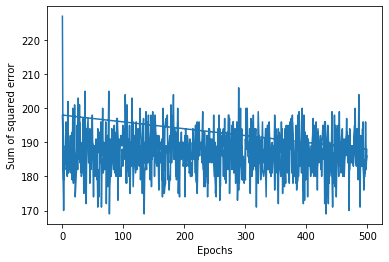

In [38]:
plt.plot(e,ss)
plt.xlabel('Epochs')
plt.ylabel('Sum of squared error')

In [39]:
acc = accuracy(y_test,y)
print('Test Accuracy :', acc)

Test Accuracy : 76.31578947368422


In [40]:
cn = confusion_matrix(y_test, y)
cn

array([[30, 26],
       [10, 86]])

In [41]:
print('classification report \n',classification_report(y_test, y))

classification report 
               precision    recall  f1-score   support

          -1       0.75      0.54      0.63        56
           1       0.77      0.90      0.83        96

    accuracy                           0.76       152
   macro avg       0.76      0.72      0.73       152
weighted avg       0.76      0.76      0.75       152



In [42]:
precision,recall,f1,support = sc(y_test, y)
print('precision for both classes: {}'.format(precision))
print('recall for both classes: {}'.format(recall))
print('f1score for both classes: {}'.format(f1))

precision for both classes: [0.75       0.76785714]
recall for both classes: [0.53571429 0.89583333]
f1score for both classes: [0.625      0.82692308]


## MLP

In [71]:
import keras.models
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense

In [72]:
import random 
random.seed(20)
np.random.seed(20)
tf.random.set_seed(20)
model = Sequential()
model.add(Dense(200, input_dim=8, activation='tanh'))
model.add(Dense(300, input_dim=8, activation='tanh'))
model.add(Dense(1, activation='tanh'))

In [73]:
y = pd.DataFrame(df.iloc[:,0])
x = df.iloc[:,1:]
x = x.to_numpy()
y = y.to_numpy()

In [74]:
# Split dataset 60:20:20
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.2, random_state=20)

In [75]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=150, verbose=0)

In [76]:
x, train_acc = model.evaluate(x_train, y_train, verbose=0)
print('Train Accuracy : ', round(train_acc,4))
y, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy : ', round(test_acc,4))

Train Accuracy :  0.6425
Test Accuracy :  0.625


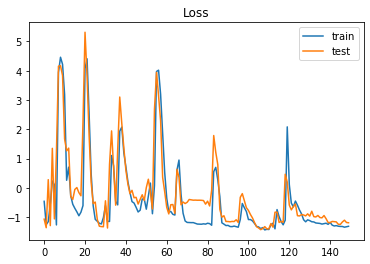

In [77]:
plt.title('Loss')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()

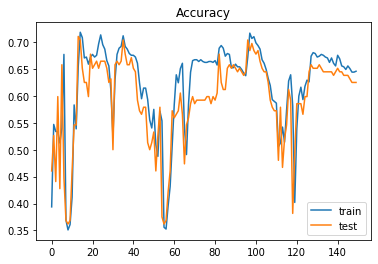

In [78]:
plt.title('Accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='test')
plt.legend()

In [79]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [80]:
y_pred = model.predict_classes(x_test, verbose=0)
y_pred[y_pred == 0] = -1
precision = round(precision_score(y_test, y_pred),4)
recall = round(recall_score(y_test, y_pred),4)
f1 = round(f1_score(y_test, y_pred),4)
print('precision : {}'.format(precision))
print('recall : {}'.format(recall))
print('f1score : {}'.format(f1))

precision : 0.8649
recall : 0.6667
f1score : 0.7529


# End